In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [8]:
df = pd.read_csv("/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv")

df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [9]:
leGender = LabelEncoder()
lePartTimeJob = LabelEncoder()
leDietQuality = LabelEncoder()
leParental = LabelEncoder()
leInternet = LabelEncoder()
leExtra = LabelEncoder()

df['Gender'] = leGender.fit_transform(df['gender'])
df['partTime'] = lePartTimeJob.fit_transform(df['part_time_job'])
df['dietQuality'] = leDietQuality.fit_transform(df['diet_quality'])
df['parentLevel'] = leParental.fit_transform(df['parental_education_level'])
df['internetQuality'] = leInternet.fit_transform(df['internet_quality'])
df['extraPart'] = leExtra.fit_transform(df['extracurricular_participation'])

dfcopy = df.drop(['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation'], axis = 'columns')

dfcopy.head()

,student_id,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,Gender,partTime,dietQuality,parentLevel,internetQuality,extraPart
0,S1000,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,0,0,0,2,0,1
1,S1001,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,0,0,1,1,0,0
2,S1002,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,1,0,2,1,2,0
3,S1003,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,0,0,2,2,1,1
4,S1004,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,0,0,0,2,1,0


In [10]:
dfcopy = dfcopy.drop(['student_id'], axis = 'columns')
dfcopy.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,Gender,partTime,dietQuality,parentLevel,internetQuality,extraPart
0,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,0,0,0,2,0,1
1,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,0,0,1,1,0,0
2,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,1,0,2,1,2,0
3,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,0,0,2,2,1,1
4,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,0,0,0,2,1,0


In [15]:
columns = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency',
           'mental_health_rating', 'Gender', 'partTime', 'dietQuality', 'parentLevel', 'internetQuality', 'extraPart'
          ]

x = df[columns]

y = df[['exam_score']]


xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.1)
xTest

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,Gender,partTime,dietQuality,parentLevel,internetQuality,extraPart
106,22,3.3,0.4,0.8,83.3,9.1,6,4,1,0,1,1,1,1
569,23,6.3,1.9,0.0,93.4,6.2,6,3,1,0,0,3,1,1
605,19,2.2,3.5,1.8,100.0,3.3,6,8,1,0,1,0,1,0
998,24,5.4,4.1,1.1,100.0,7.6,0,1,1,1,0,0,0,0
453,22,3.4,2.5,2.2,63.2,7.4,1,4,0,0,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,21,3.3,1.7,1.8,85.2,7.7,0,2,1,0,2,1,1,0
50,23,1.6,1.0,3.1,82.8,5.5,4,10,0,0,0,2,1,1
765,19,2.1,2.8,1.4,82.8,6.3,1,3,1,1,2,2,0,0
825,20,4.3,1.3,0.0,90.2,6.3,0,7,1,1,1,1,0,0


In [16]:
model = linear_model.LinearRegression()
model.fit(xTrain, yTrain)

LinearRegression()

In [40]:
model.score(xTest, yTest)

0.89783095794193

In [44]:
model = RandomForestRegressor()
model.fit(xTrain, yTrain)

/tmp/ipykernel_35/3701160108.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xTrain, yTrain)


RandomForestRegressor()

In [45]:
model.score(xTest, yTest)

0.8525190788063104

In [47]:
model = SVR()
model.fit(xTrain, yTrain)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [59]:
model.score(xTrain, yTrain)

0.06787015452665679

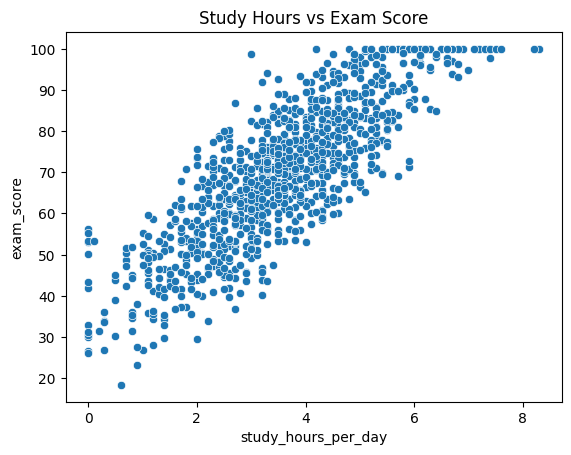

In [36]:
sn.scatterplot(data=df, x='study_hours_per_day', y='exam_score')
plt.title('Study Hours vs Exam Score')
plt.show()

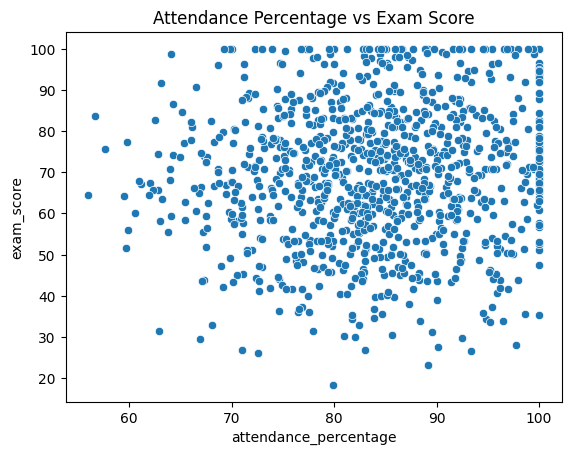

In [38]:
sn.scatterplot(data = df, x = 'attendance_percentage', y = 'exam_score')
plt.title('Attendance Percentage vs Exam Score')
plt.show()

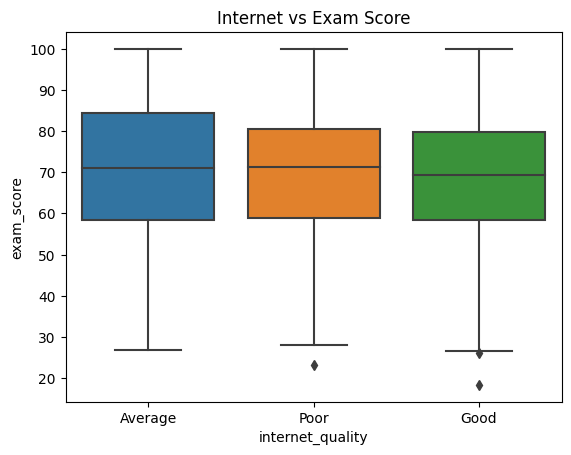

In [39]:
sn.boxplot(data = df, x = 'internet_quality', y = 'exam_score')
plt.title('Internet vs Exam Score')
plt.show()